## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# the directory will be changed by my main images directory
# have to check how this function works. Didnt catch a single thing
# Import helper functions
def split_dir_to_train_test_val(directory = "images/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):

  #Creates 3 folders for Train, Test and Validation data

  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42) # this seed value will be used for all the next random number generators.

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"): #works also without the "/" in the end
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "/content/drive/MyDrive/dumE image Classifier/files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True) #creates a directory if it doesn't exist. If exists then skips

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "/content/drive/MyDrive/dumE image Classifier/files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "/content/drive/MyDrive/dumE image Classifier/files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

In [ ]:
import os
os.chdir("/content/drive/MyDrive/dumE image Classifier/images")

In [ ]:
# directory i/p will be changed by the images directory
# Split images dir to train, test and validation to a new folder named files
split_dir_to_train_test_val(directory="/content/drive/MyDrive/dumE image Classifier/images/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder pos_1. Train data copied. 277 files
Folder pos_1. Test data copied. 80 files
Folder pos_1. Validation data copied. 40 files
Folder pos_8. Train data copied. 69 files
Folder pos_8. Test data copied. 20 files
Folder pos_8. Validation data copied. 10 files
Folder pos_9. Train data copied. 69 files
Folder pos_9. Test data copied. 20 files
Folder pos_9. Validation data copied. 10 files
Folder pos_3. Train data copied. 277 files
Folder pos_3. Test data copied. 79 files
Folder pos_3. Validation data copied. 40 files
Folder pos_4. Train data copied. 277 files
Folder pos_4. Test data copied. 79 files
Folder pos_4. Validation data copied. 40 files
Folder pos_2. Train data copied. 277 files
Folder pos_2. Test data copied. 79 files
Folder pos_2. Validation data copied. 40 files
Folder pos_5. Train data copied. 277 files
Folder pos_5. Test data copied. 79 files
Folder pos_5. Validation data copied. 40 files
Folder pos_7. Train data copied. 84 files
Folder pos_7. Test data copied. 23 files
Fo

[link text](https://)

## visualization of a random data

In [ ]:
def get_class_names_from_folder(directory):

  #Get the classnames from train folder

  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="/content/drive/MyDrive/dumE image Classifier/files/train")
class_names

array(['pos_1', 'pos_2', 'pos_3', 'pos_4', 'pos_5', 'pos_6', 'pos_7',
       'pos_8', 'pos_9'], dtype='<U5')

In [ ]:
len(class_names)

9

In [ ]:
# creating a fucntion to visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):

  #Visualises random image from exact directory

  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

In [ ]:
# for width shifting visualization
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random

def visualize_random_image_shift(target_dir, target_class):
    # Visualizes a random image from the exact directory with width and height shift

    image_dir = target_dir + target_class
    random_image = random.sample(os.listdir(image_dir), 1)
    img_path = os.path.join(image_dir, random_image[0])

    # Load the image
    img = mpimg.imread(img_path)

    # Apply width and height shift
    width_shift = 0.2
    height_shift = 0.2
    img = tf.keras.preprocessing.image.apply_affine_transform(img,
                                                              tx=width_shift * img.shape[1],
                                                              ty=height_shift * img.shape[0])

    # Display the image
    plt.imshow(img)
    plt.title(target_class)
    plt.show()



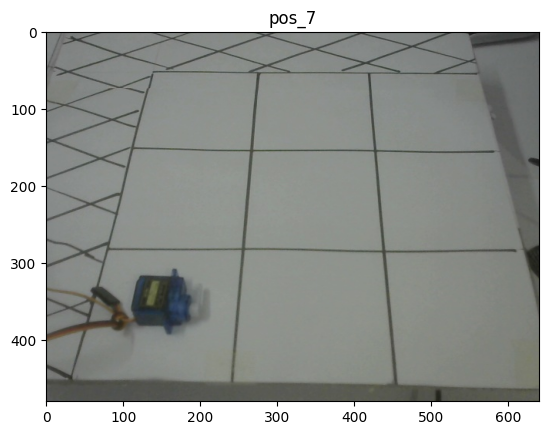

In [ ]:
# Using the function defined in the previous cell.
visualize_random_image("/content/drive/MyDrive/dumE image Classifier/files/test/", "pos_7")

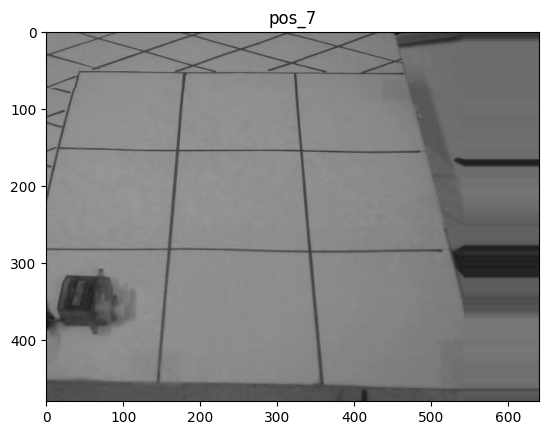

In [ ]:
# Using the function defined in the previous cell.
visualize_random_image_shift("/content/drive/MyDrive/dumE image Classifier/files/test/", "pos_7")

## Creating datasets from directories

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #using image data generator for preprocessing of image
#using 3 image data generators for 3 sets and only applying rescaling here.
train_datagen = ImageDataGenerator(rescale=1/255,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,

                                 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/dumE image Classifier/files/train",
                                               target_size=(240, 240),

                                               batch_size=20,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/dumE image Classifier/files/test",
                                               target_size=(240, 240),

                                               batch_size=20,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/dumE image Classifier/files/validation",
                                               target_size=(240, 240),

                                               batch_size=20,
                                               class_mode="categorical")

Found 1884 images belonging to 9 classes.
Found 538 images belonging to 9 classes.
Found 273 images belonging to 9 classes.


In [ ]:
#modified Training data gegnerator for grayscale
#might be removed later without any issue

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using image data generator for preprocessing of image
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

# Example directory paths, replace them with your actual paths
train_directory = "/content/drive/MyDrive/dumE image Classifier/files/train"
test_directory = "/content/drive/MyDrive/dumE image Classifier/files/test"
validation_directory = "/content/drive/MyDrive/dumE image Classifier/files/validation"

train_data = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(240, 240),
    batch_size=10,
    class_mode="categorical",
    color_mode="grayscale"  # Add this line to specify grayscale mode
)

test_data = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(240, 240),
    batch_size=10,
    class_mode="categorical",
    color_mode="grayscale"
)

validation_data = val_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=(240, 240),
    batch_size=10,
    class_mode="categorical",
    color_mode="grayscale"
)


Found 126 images belonging to 9 classes.
Found 36 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


## Creating and fitting the model

In [ ]:
# @title
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(5, activation="softmax") # change the o/p neuron number according to number of classes
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [ ]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(9, activation="softmax") # change the o/p neuron number according to number of classes
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

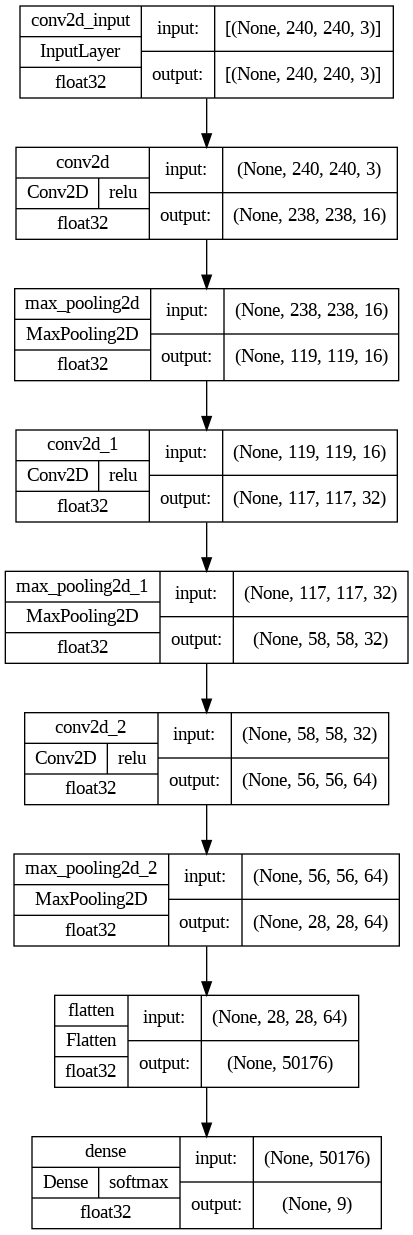

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

In [ ]:
# added later for Grayscale
#this section can be deleted later


# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(240, 240, 1)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(9, activation="softmax") # change the o/p neuron number according to number of classes
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])


In [ ]:
model.summary()

In [ ]:
# Fit the model
history = model.fit(train_data,
                    batch_size=20,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Evaluating the model


## Visualizing intermediate Steps


1/1 [==============================] - 9s 9s/step


<ipython-input-11-2164d4028b60>:39: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


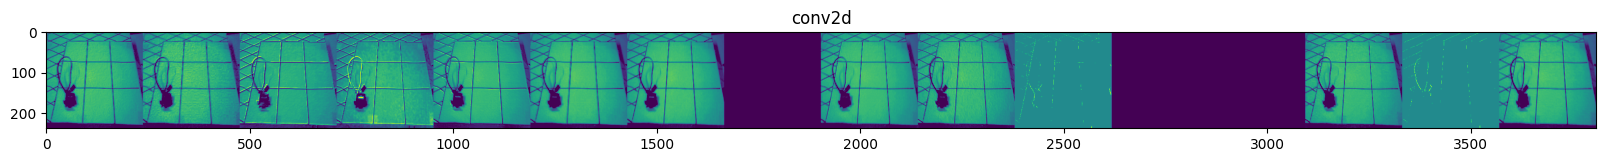

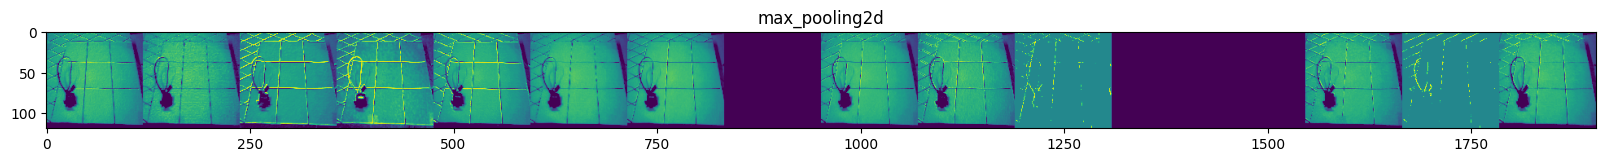

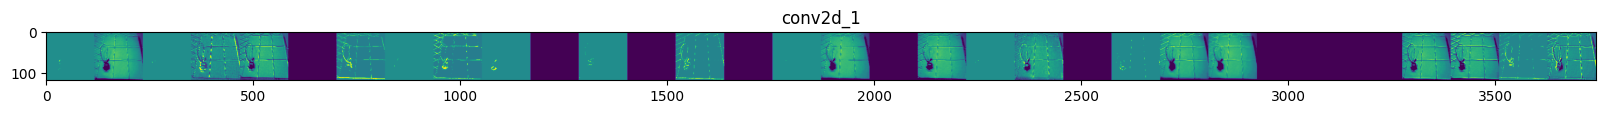

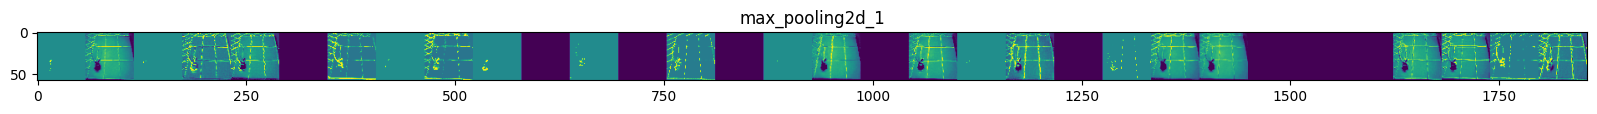

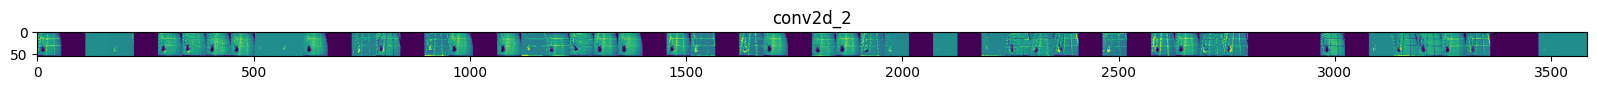

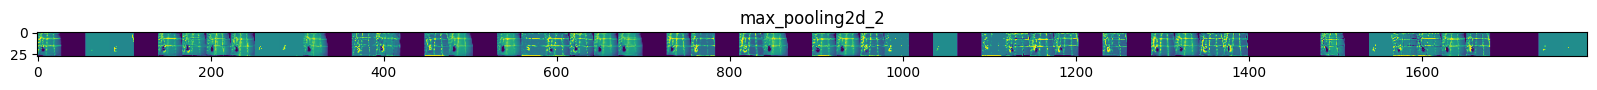

In [ ]:
# delete this section whenever u want

import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


# Helper function to get layer outputs
def get_intermediate_layers(model, img_path):
    # Load the image and preprocess it
    img = load_img(img_path, target_size=(240, 240))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.0

    # Create a model that outputs the intermediate layers
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

    # Predict with the intermediate model
    intermediate_feature_maps = intermediate_model.predict(x)

    return intermediate_feature_maps

# Function to visualize intermediate feature maps
def visualize_intermediate_feature_maps(intermediate_feature_maps, layer_names):
    for layer_name, feature_map in zip(layer_names, intermediate_feature_maps):
        if len(feature_map.shape) == 4:
            n_features = feature_map.shape[-1]
            size = feature_map.shape[1]

            display_grid = np.zeros((size, size * n_features))

            for i in range(n_features):
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size: (i + 1) * size] = x

            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.show()

# Get a random image path from your generator
img_path = random.choice(train_data.filepaths + test_data.filepaths + validation_data.filepaths)

# Get intermediate feature maps
intermediate_feature_maps = get_intermediate_layers(model, img_path)

# Get layer names
layer_names = [layer.name for layer in model.layers]

# Visualize intermediate feature maps
visualize_intermediate_feature_maps(intermediate_feature_maps, layer_names)


In [ ]:
model.evaluate(test_data)

27/27 [==============================] - 2s 92ms/step - loss: 2.7828e-05 - accuracy: 1.0000


[2.782764750008937e-05, 1.0]

<Axes: >

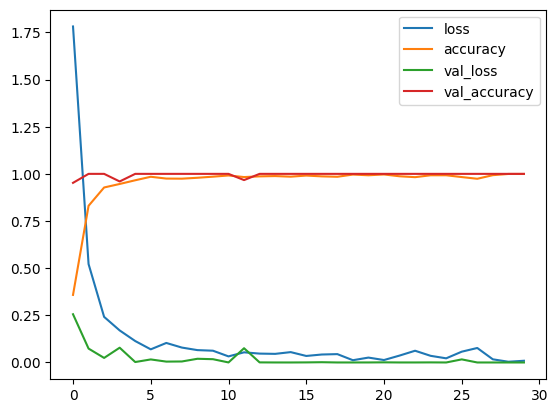

In [ ]:
import pandas as pd
#plotting the loss,accuracy,val_loss,val_accuracy from history object
pd.DataFrame(history.history).plot() #converting histpry dictionary to Pandas dataframe and plotting

In [ ]:
# defining a function for plotting training results withous using pandas library
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

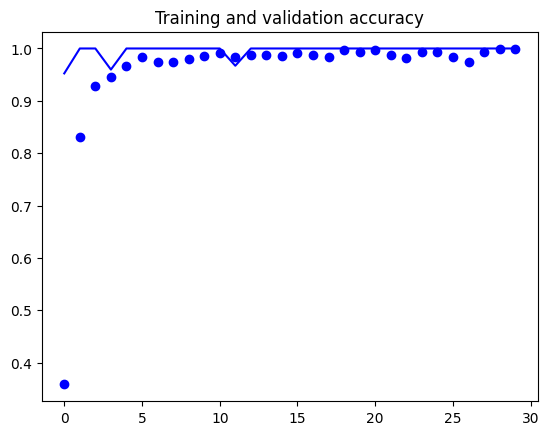

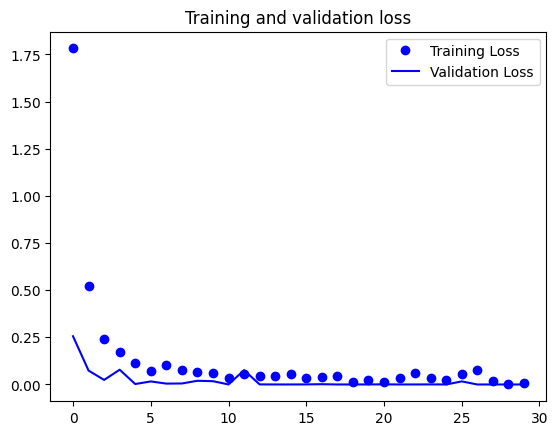

In [ ]:
plot_loss_acc(history)

## Testing the predictions

In [ ]:
# will be used with the function for taking i/p from camera
# helper function for loading and resizing a image
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

In [ ]:
#for grayscale
#can be removed later

import tensorflow as tf

# Helper function for loading and resizing an image
def load_and_resize_image(filename, size, grayscale=True):
    # Read image file
    img = tf.io.read_file(filename)

    # Decode image
    if grayscale:
        img = tf.image.decode_image(img, channels=1)  # Set channels to 1 for grayscale
    else:
        img = tf.image.decode_image(img)

    # Resize image
    img = tf.image.resize(img, [size, size])

    # Normalize the pixel values to the range [0, 1]
    img = tf.cast(img, dtype=tf.float32) / 255.0

    return img


In [ ]:
image = load_and_resize_image("/content/drive/MyDrive/dumE image Classifier/position2.jpg", 240)

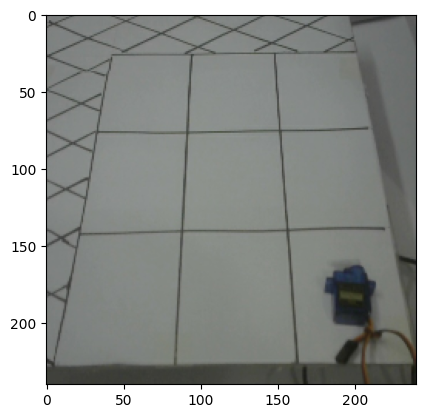

In [ ]:
plt.imshow(image)

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 0s 29ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.2926962e-28, 2.3040735e-30,
        2.4550599e-23, 5.4000074e-17, 0.0000000e+00, 5.7211488e-18,
        1.0000000e+00]], dtype=float32)

In [ ]:
s=class_names[pred[0].argmax()]

In [ ]:
s

'pos_9'

## Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
os.chdir("/content/drive/MyDrive/dumE image Classifier")
os.getcwd()

'/content/drive/MyDrive/dumE image Classifier'

In [ ]:
#model.save(os.path.join('models','imageclassifier.h5'))
#os.chdir("/content/drive/MyDrive/test multi-class image classifier")
model.save(os.path.join('dumEimageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Rest of the portion was used to test if the model could be properly loaded or not. So, don't need to run from this script. another tester script has been made

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
image = load_and_resize_image("/content/drive/MyDrive/test multi-class image classifier/IMG_1103.jpg", 240)

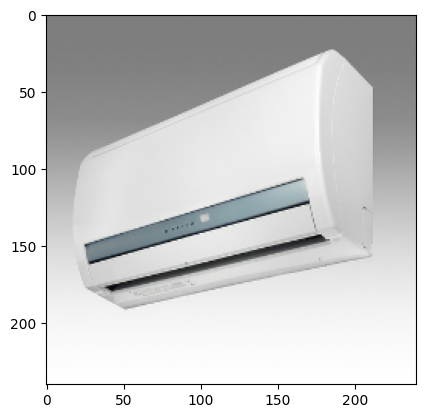

In [ ]:
plt.imshow(image)

In [ ]:
#new_model.predict(np.expand_dims(resize/255, 0))
new_pred=new_model.predict(tf.expand_dims(image, axis=0))
new_pred

1/1 [==============================] - 7s 7s/step


array([[0.47693726, 0.13099952, 0.1659478 , 0.10038017, 0.12573525]],
      dtype=float32)

In [ ]:
new_pred_name=class_names[new_pred[0].argmax()]
new_pred_name

'ac'